# Discussion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
testacc = pd.read_csv('testacc.txt', header=None).iloc[:,1:4]
testacc.columns = ['pretrained', 'classification', 'accuracy']
testacc.set_index(['pretrained', 'classification'], inplace=True)
testacc.head()

accuracy
pretrained  classification               
VGG16       logistic regression     0.772
            1-layer nn              0.684
            2-layer nn              0.772
InceptionV3 logistic regression     0.660
            1-layer nn              0.625

In [3]:
acc = testacc.unstack()
acc.head()

accuracy                               
classification    1-layer nn 2-layer nn logistic regression
pretrained                                                 
DenseNet121            0.758      0.789               0.840
EfficientNetB0         0.731      0.802               0.788
InceptionResNetV2      0.670      0.724               0.774
InceptionV3            0.625      0.702               0.660
ResNet50               0.860      0.895               0.857

In [4]:
acc['mean'] = acc.mean(axis=1)
acc.sort_values('mean', inplace=True, ascending=False)
acc.head()

accuracy                                     mean
classification 1-layer nn 2-layer nn logistic regression          
pretrained                                                        
ResNet50            0.860      0.895               0.857  0.870667
DenseNet121         0.758      0.789               0.840  0.795667
EfficientNetB0      0.731      0.802               0.788  0.773667
Xception            0.716      0.788               0.728  0.744000
VGG16               0.684      0.772               0.772  0.742667

In [5]:
acc.drop('mean', axis=1, inplace=True)
#acc.index # multiindex lost
# stack, as multiindex is lost after droping column 'mean'
acc = acc.stack()
#acc.index

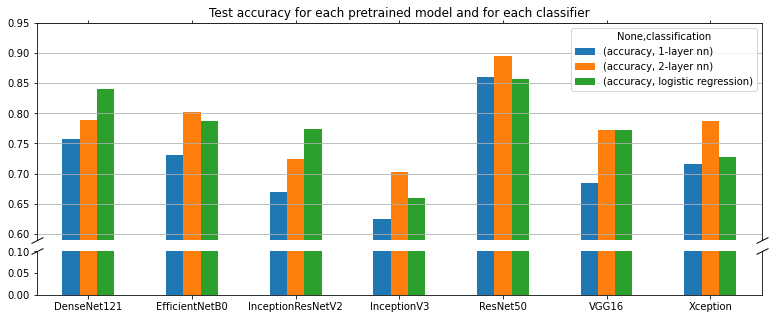

In [6]:
# see https://matplotlib.org/stable/gallery/subplots_axes_and_figures/broken_axis.html

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax1) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(13,5), gridspec_kw={'height_ratios': [5, 1]})
fig.subplots_adjust(hspace=0.09)  # adjust space between axes

acc.unstack().plot.bar(ax=ax1)
acc.unstack().plot.bar(ax=ax2, legend=None)
# plot the same data on both axes
#ax1.bar(a)
#ax2.bar(a)

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(0.59, 0.95)  # outliers only
ax2.set_ylim(0.0, 0.1)  # most of the data

# hide the spines between ax1 and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.set_xlabel(None)
ax2.set_xlabel(None)

ax1.grid(visible=True, axis='y')
ax1.set_title('Test accuracy for each pretrained model and for each classifier')

plt.xticks(rotation=0)

plt.show()